# GROUP 5 SARRIA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
#df_test.head()


,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


## EXPLORATION

In [4]:
df_train.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


In [5]:
# Start the exploration

df_train.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 937.6+ KB


In [2]:
'''
Before we start the rest of the exploration, we need to format some variables to make it easier and more intuitive.

1. We will extract the variables floor and door from the variable 'door' and format them in a usable way.
2. We will make sure that the variables have consistent labels. 
'''

# We create variables floor and door from the variable 'door'

df_train['num_floor'] = pd.to_numeric(df_train['door'].str.split('º').str[0], errors = 'coerce')
df_train.describe()

#print(df_train['door'].unique())
#print(df_train['door'].str.split(' '))

df_train['num_floor'] = pd.to_numeric(df_train['door'].str.split('º').str[0], errors = 'coerce')
df_train['num_door'] = pd.to_numeric(df_train['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_train.describe()

'''
Now that we have the variables floor and door, we can delete the variable 'door'.
'''

df_train = df_train.drop(['door'], axis = 1)
display(df_train.head())

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,2.0,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,NaN,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,3.0,962,5.0,1.0


In [3]:
# We study the different labels that non-numeric variables have

for column in df_train.select_dtypes(exclude = ['int', 'float']).columns:
    print(f"> {column}: {df_train[column].unique()}\n")

'''
We can observe that there are some inconsistencies that we will need to handle:
1. In 'orientation' we have 'south' and 'soxth'. We need to change 'soxth' to 'south'.
2. In 'neighborhood' we have no inconsistencies but there is a consistent typo. We will change 'Les Cors' to 'Les Corts'.
3. The rest of the variables have no inconsistencies aside from having missing values, which we will handle infra.
'''

df_train['neighborhood'] = df_train['neighborhood'].replace('Les Cors', 'Les Corts')
df_train['orientation'] = df_train['orientation'].replace('soxth', 'south')

if not df_train['orientation'].isin(['soxth']).any() and not df_train['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')



> orientation: [nan 'west' 'east' 'north' 'south' 'soxth']

> is_furnished: [False True nan]

> has_pool: [False True nan]

> neighborhood: ['Sant Martí' 'Sants' 'Eixample' 'Gràcia' nan 'Les Cors'
 'Sarrià-Sant Gervasi' 'Horta' 'Sant Andreu' 'Ciutat Vella' 'Nou Barris']

> has_ac: [True False nan]

> accepts_pets: [True False nan]

>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<


## IDENTIFY ANOMALIES AND MISSING DATA

id                  0
num_rooms           0
num_baths         160
square_meters     155
orientation      2341
year_built        170
is_furnished      165
has_pool          156
neighborhood      165
num_crimes        160
has_ac            169
accepts_pets      155
price               0
num_floor         149
num_door          149
dtype: int64


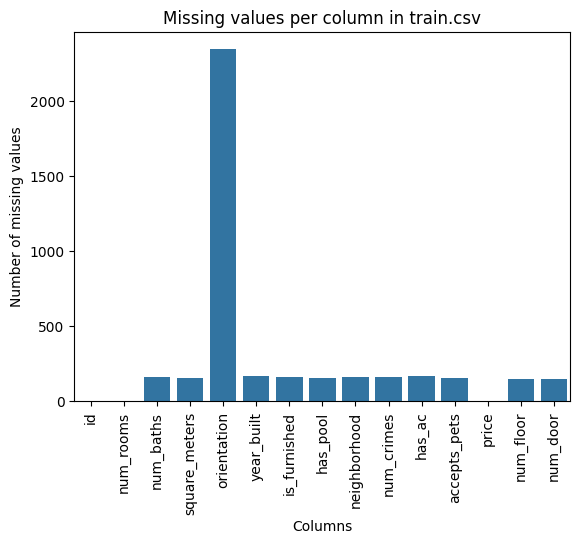

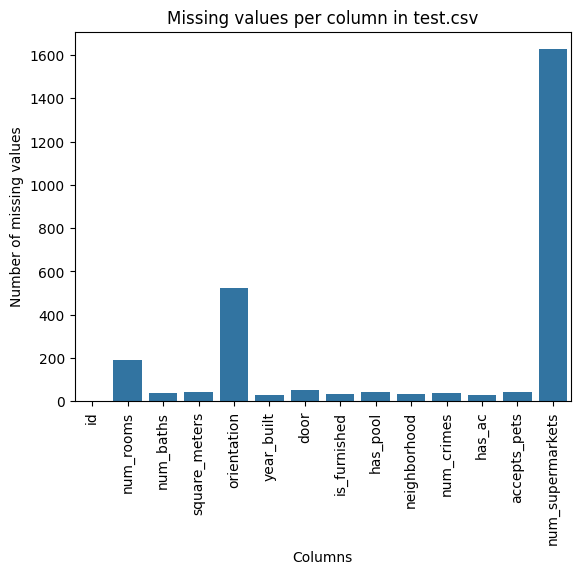

In [17]:
# INVESTIGATE WHETHER THE MISSING VALUES ARE AT RANDOM OR NOT
nas_train = df_train.isnull().sum()
print(nas_train)
sns.barplot(x = nas_train.index, y = nas_train.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in train.csv')
plt.show()

nas_test = df_test.isnull().sum()
sns.barplot(x = nas_test.index, y = nas_test.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in test.csv')
plt.show()

### HANDLING NUM_SUPERMARKETS


In [5]:
print(f"{int(6589*100/8000)} %")

'''
Since column num_supermarkets has more than 80% of missing values, we will drop it.
'''

df_train = df_train.drop(columns = ['num_supermarkets'], axis = 1)
display(df_train.head())

82 %


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5.0,1.0


### TESTING WHETHER MISSING DATA IS MISSING COMPLETELY AT RANDOM


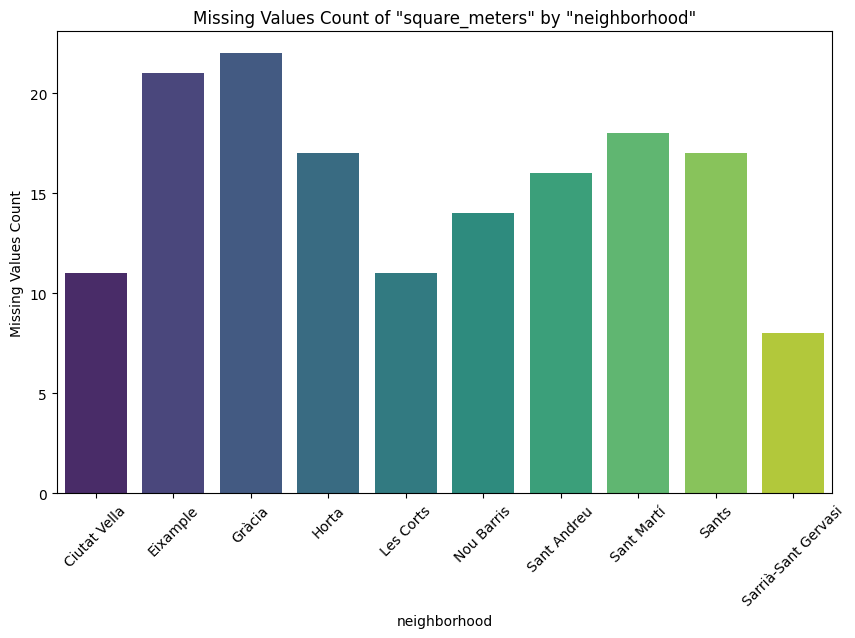

In [6]:
# Filter rows where 'neighborhood' is not missing
df_filtered = df_train.dropna(subset=['neighborhood'])

# Group the filtered DataFrame by values in 'square_meters' and calculate the count of missing values in 'neighborhood'
missing_values_counts = df_filtered.groupby('neighborhood')['square_meters'].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_counts.rename(columns={'square_meters': 'Missing Values Count'}, inplace=True)

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_values_counts, x='neighborhood', y='Missing Values Count', hue = 'neighborhood', palette='viridis', legend = False)
plt.title(f'Missing Values Count of "square_meters" by "neighborhood"')
plt.xlabel('neighborhood')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0


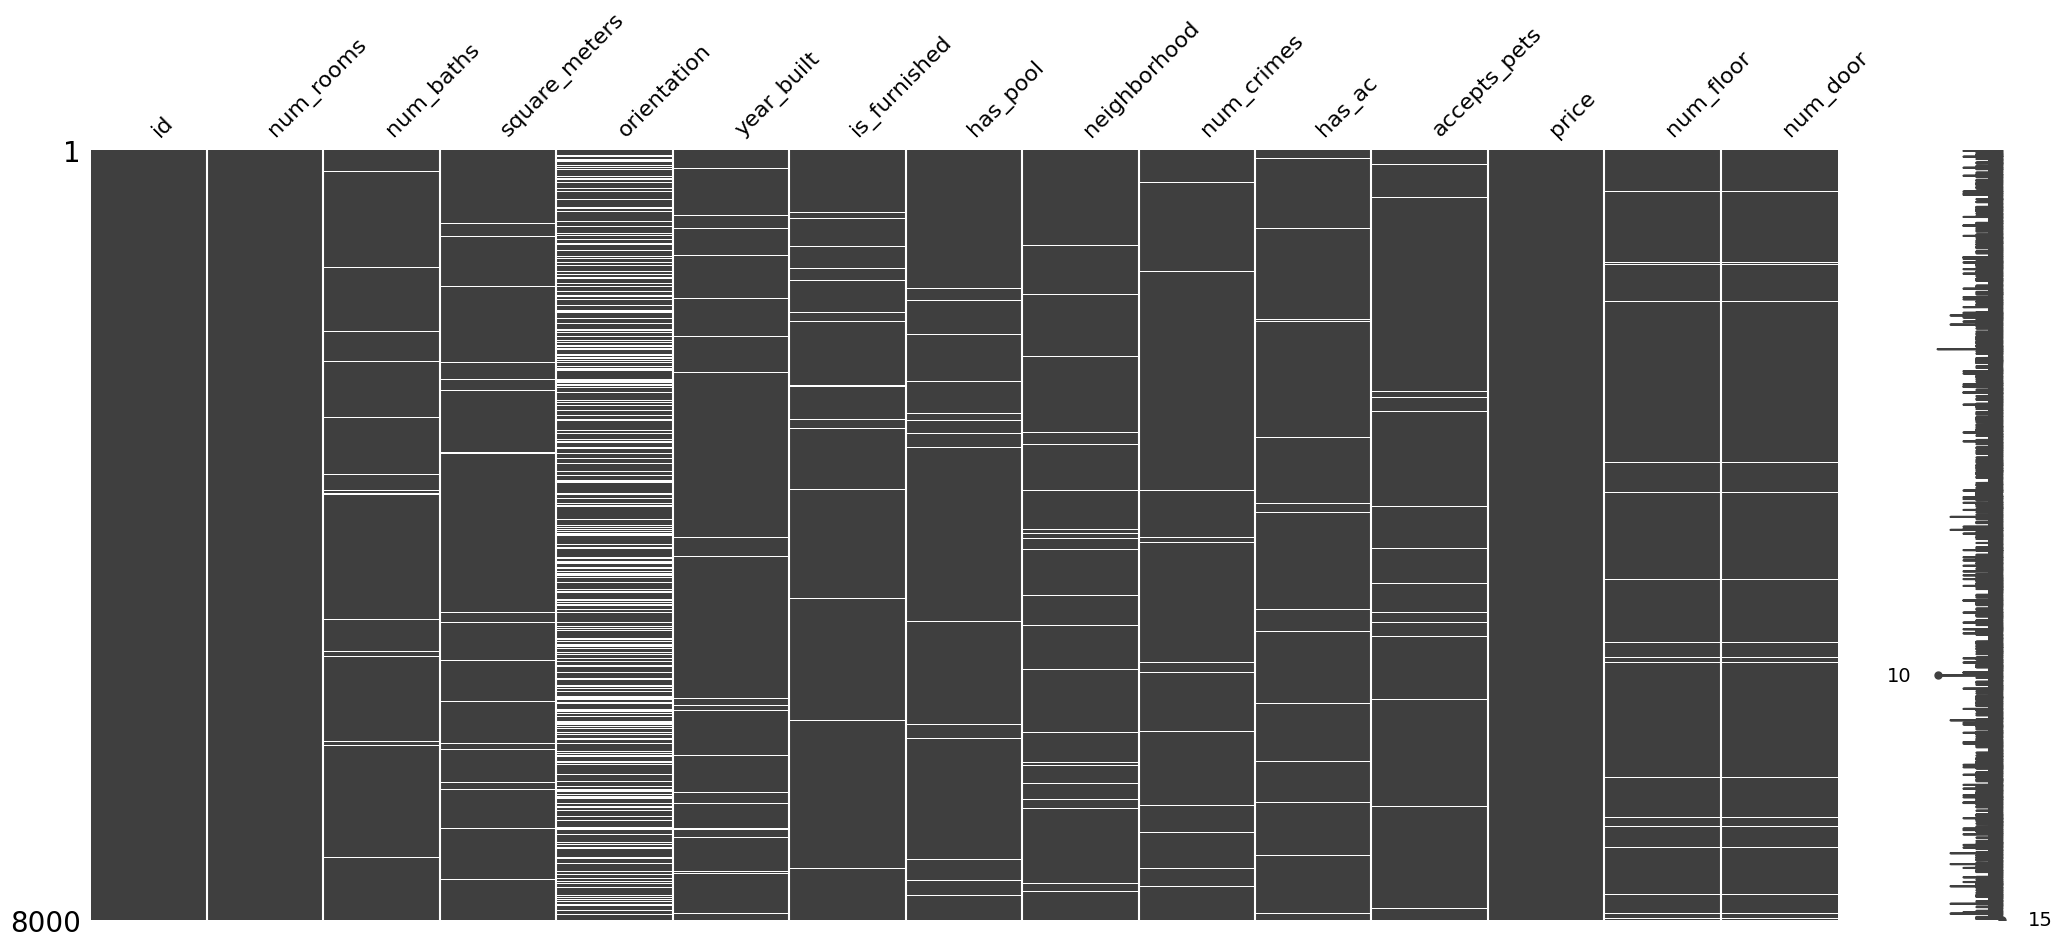

In [16]:
import missingno as msno
from scipy.stats import chi2_contingency

msno.matrix(df_train)

for column in df_train.columns:
    observed = df_train[column].notna().sum() + 0.5 # Count of observed values
    missing = df_train[column].isna().sum() + 0.5    # Count of missing values
    contingency_table = [[observed, missing]]
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f'p-value: {p}')

'''
As we can observe, the missing values are very probably MCAR so we can handle them without too many problems.
We will try different systems.
'''

### NEXT THING 

In [12]:
# NUM_ROOMS
outliers = df_train[df_train['num_rooms'] > 6]
print(len(outliers)) # too many outliers, propose mean imputation per neighborhood


46


In [ ]:
# filling outliers
# distr_means = df_train[df_train['neighborhood']].mean()
# distr_means.plot(kind='bar')




FOR BOOLEANS, REMOVE REFERS TO PAIRWISE DELETION

NUM_BATHROOMS treat identically to num_rooms

SQUARE_METERS a lot of negatives
treat it 3 different ways, 1) remove negatives (just leave values as positives) and then treat outliers with mean imputation, 2) replace with mean per neighborhood, 3) Logical approach

ORIENTATION only relevant in relation to the neighborhood and above a certain floor if it's facing the sea (treat as secondary)

FLOOR treat missing values (by neighborhood)

DOOR the actual door not important but extracting the floor is important

FURNISHED boolean value (secondary), MISSING VALUES REMOVE

HAS POOL boolean value (secondary), MISSING VALUES REMOVE, analyze the effect by neighborhood

NEIGHBORHOOD categorical variable, MISSING VALUES REMOVE, check (secondary check)

NUM_CRIMES ANALYZE PER NEIGHBORHOOD, NEIGHBORHOODS TOO WIDE TREAT CAREFULLY

HAS_AC boolean value, MISSING VALUES REMOVE

ACCEPTS_PETS boolean value, MISSING VALUES REMOVE

NUM_SUPERMARKETS too many missing, JUST REMOVE COLUMN

num_rooms, outliers in > 6, propose removal.

# LINEAR MODEL, FIRST DRAFT 


In [10]:
#Ed draft model code

# Import necessary libraries
#from sklearn.model_selection import train_test_split  #split data into training and testing sets
from sklearn.linear_model import LinearRegression #create linear regression model
from sklearn.metrics import mean_squared_error #evaluate the model performance

#Part 1: create model
df_train_dropna = df_train[['id','square_meters', 'num_rooms', 'num_baths', 'price']].dropna(axis=0) 
print(df_train_dropna)

df_test_dropna = df_test[['id', 'square_meters', 'num_rooms', 'num_baths']].fillna(df_test.mean(numeric_only=True)) 
print(df_test_dropna)

# Split the data into features (X) and target (y)
X_train_features = df_train_dropna[['square_meters', 'num_rooms', 'num_baths']] #we need to select the key feature columns 
y_train = df_train_dropna['price'] #what we want to predict

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression() #LR model created and initialised
model.fit(X_train_features, y_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(X_train_features) #via the trained model

#Part 2: Check Model

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred) #measure model performance, lower the MSE the better the fit between the predicted and the actual prices.  
#print(f"Mean Squared Error: {mse}")
#Part 3 Predict and add apartment prices in the test dataset

# Use trained model to predict prices for apartments in the test dataset
#test_data = pd.read_csv('test.csv')  # Load your test dataset
X_test_features = df_test_dropna[['square_meters', 'num_rooms', 'num_baths']]
predicted_prices = model.predict(X_test_features)

# Add the predicted prices to the test dataset
df_test_dropna['price'] = predicted_prices
df_test_dropna['price'] = df_test_dropna['price'].astype(int)
df_test_dropna['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
df_test_dropna[['id', 'price']].to_csv('predicted_apartment_prices.csv', index=False)

        id  square_meters  num_rooms  num_baths  price
1     1562          133.0        4.0        1.0   1396
2     1671          137.0        2.0        3.0   1263
3     6088          -41.0        1.0        2.0   1290
4     6670           70.0        2.0        1.0    962
5     5934           77.0        4.0        2.0    760
...    ...            ...        ...        ...    ...
7994  6266           62.0        3.0        3.0    928
7996  5192          166.0        4.0        3.0   1255
7997  5391           89.0        4.0        1.0   1220
7998   861          167.0        4.0        2.0   1547
7999  7271           95.0        2.0        1.0   1133

[7686 rows x 5 columns]
        id  square_meters  num_rooms  num_baths
0     6253          152.0   4.533444        1.0
1     4685           90.0   4.533444        2.0
2     1732           86.0   4.533444        2.0
3     4743          164.0   4.533444        3.0
4     4522           99.0   4.533444        1.0
...    ...            ...  

## MODEL RELATED NOTES

Try lasso, ridge and linear model, BEGIN WITH LINEAR